# Parameter Estimation

## Method of Moments

The method of moments involves equating <em>**sample moments**</em> with <em>**theoretical moments**</em>. Some definitions:
<br>
1. $\mathbb{E}\left[X^k\right]$ is the $k^{th}$ theoretical moment of the distribution (about the origin), for $k = 1,2,\dots$
2. $\mathbb{E}\left[\left(X - \mu\right)^k\right]$ is the $k^{th}$ theoretical moment of the distribution (about the mean), for $k = 1,2,\dots$
3. $M_k = \frac{1}{n}\sum_{i=i}^{n} X_{i}^{k}$ is the $k^{th}$ sample moment,for $k = 1,2,\dots$
4. $M_k = \frac{1}{n}\sum_{i=i}^{n} \left(X_{i} - M_1\right)^{k}$ is the $k^{th}$ sample moment about the mean, for $k = 1,2,\dots$.

### Algorithm
**Input:** 
- The parameters $\theta_1,\dots,\theta_k$ to be estimated. 
- The samples $X_1, X_2,\dots, X_n$ drawn from the distribution of interest
**Output**
- The estimators $\hat{\theta}_1, \hat{\theta}_2, \dots, \hat{\theta}_k$of the true parameters
<br>
**Step 1.** Equate the first sample moment about the origin $M_1 = \frac{1}{n}\sum_{i=1}^{n} X_{i} = \bar{X}$ to the first theoretical moment $\mathbb{E}\left[X\right]$.
<br>
**Step 2.** Equate the second sample moment about the origin $M_2 = \frac{1}{n}\sum_{i=i}^{n} X_{i}^2$ to the second theoretical moment $\mathbb{E}\left[X^2\right]$.
<br>
**Step 3.** Continue equating samples about the origin $M_k$ with the corresponding theoretical moments $\mathbb{E}\left[X^k\right]$, $k = 3, 4, \dots$
<br>
**Step 4.** Calculate the parameters $\theta$ by solving the simultaneous system of equations.

In [2]:
using Distributions
using BasicBSpline
using Plots

function asymptotic_estimator(true_params::Vector{Float64}, estimator, dist, sample_sizes)
    p = true_params
    #true_param = [p for i in 1:length(sample_sizes)]
    θ̂ = []
    for n in sample_sizes
        d = dist(p[1],p[2])
        push!(θ̂, estimator(rand(d, n)))
    end
    Plots.plot!(sample_sizes, θ̂, label="p = $p",)
    Plots.title!("Asymptotic Plot of Estimators")
    Plots.xlabel!("Number of samples")
    Plots.ylabel!("Parameter Estimate")
end

function asymptotic_estimator(true_params::Float64, estimator, dist, sample_sizes)
    p = true_params
    #true_param = [p for i in 1:length(sample_sizes)]
    θ̂ = []
    for n in sample_sizes
        d = dist(p)
        push!(θ̂, estimator(rand(d, n)))
    end
    Plots.plot!(sample_sizes, θ̂, label="p = $p",)
    Plots.title!("Asymptotic Plot of Estimators")
    Plots.xlabel!("Number of samples")
    Plots.ylabel!("Parameter Estimate")
end

function asymptotic_estimator_plot(true_params::Vector{Float64}, estimator, dist, sample_sizes)
    fig = Plots.plot()
    if length(true_params) > 1
        for p in true_params[1:end-1]
            asymptotic_estimator(p, estimator, dist, sample_sizes)
        end
    end
    display(asymptotic_estimator(true_params[end], estimator, dist, sample_sizes))
end

asymptotic_estimator_plot (generic function with 1 method)

### Example 1
Let $X_1, X_2, \dots, X_n$ be Bernoulli random variables with parameter $p$. What is the method of moments estimator for p?
<br>
<em>**Hint:** The p.m.f of the Bernoulli distribution is given by </em>$P\left(x\right) = p^{x}\left(1-p\right)^{1-x}\mathbb{I}_{\{0,1\}}\left(x\right)$.

Show that $\mathbb{E}\left[X\right] = p$
<br>
**Solution**:
<br>
<br>
$\mathbb{E}\left[X\right] = \sum_{x} x\cdot P\left(x\right) = 0 \cdot P\left(X = 0\right) + 1\cdot P\left(X=1\right) = p\left(1-p\right)^{0} = p$             **(Population Mean)**

**Estimating $p$ using the Method of Moments:**
<br>
First, we set the theoretical and sample moments equal to each other. We only have one parameter to estimate, $p$; so, we only need one equation to estimate the parameter. We set the equation $\mu = \bar{x}$ as our first (and only) equation. We know that $\mu = \mathbb{E}\left[X\right]$ and $\bar{x} = M_1 = \frac{1}{n}\sum_{i=i}^{n} X_{i}$. It follows that $\mathbb{E}\left[X\right] = M_1 = \frac{1}{n}\sum_{i=1}^{n} X_{i} = p$. Therefore, $p \approx \hat{p} =  \frac{1}{n}\sum_{i=1}^{n} X_{i}$. 

In [3]:
function bern_p_estimator(samples)
    sum_X = sum(samples)
    n = length(samples)
    return sum_X / n
end

function wrong_estimator(samples)
    sum_X = sum(samples)
    n = length(samples)
    return sum_X / (n^2)
end

wrong_estimator (generic function with 1 method)

In [16]:
# Example for generating random samples X_i from a distribution d
d = Bernoulli(0.3)
X_i = rand(d, 5)

5-element Vector{Bool}:
 0
 0
 1
 0
 0

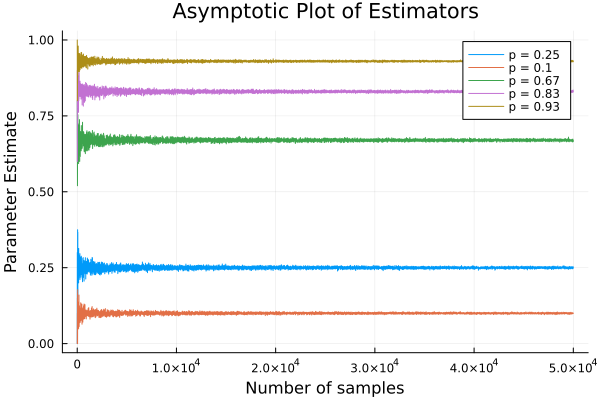

In [3]:
ps = [0.25, 0.1, 0.67, 0.83, 0.93] # for example, X is drawn from Bernoulli(p=0.93)
bern = Bernoulli
sample_sizes = [5 * x for x in 1:10000]

plt1 = asymptotic_estimator_plot(ps, bern_p_estimator, bern, sample_sizes)

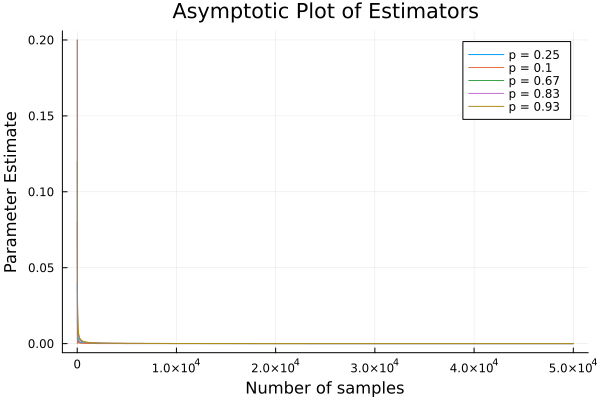

In [4]:
# What if we used a wrong estimator?
plt2 = asymptotic_estimator_plot(ps, wrong_estimator, bern, sample_sizes)

### Example 2
Let $X_1, X_2, \dots, X_n$ be Binomial random variables with parameters $n,p$. What is the method of moments estimator for $p$?
<br>
<em>**Hint:** The p.m.f of the Binomial distribution is given by </em>$P\left(x\right) = {n \choose x} p^{x}\left(1-p\right)^{n-x}$.

Notice that this distribution has two parameters, $n$ and $p$. To use the method of moments, we need the expectation and the variance of this distribution. Let's first obtain the expectation and variance of the Binomial distribution.
<br>
1. <em>Show that $\mathbb{E}\left[X\right] = np$.</em>
<br>
**Proof**:
<br>
We know that for a discrete random variable $\mathbb{E}\left[X\right] = \sum_{x} x P\left(X = x\right)$. It follows that $\mathbb{E}\left[X\right] = \sum_{x} x P\left(X = x\right) = \sum_{x = 0}^{n} x{n \choose x}p^{x}(1-p)^{n-x}$. Since the term when $x = 0$ vanishes, we can reduce this to $\sum_{x = 1}^{n} x{n \choose x}p^{x}(1-p)^{n-x} = \sum_{x = 1}^{n} x\left(\frac{n!}{x!(n-x)!}\right)p^{x}(1-p)^{n-x}$. We know that $x! = x\cdot (x-1)!$, so we can further reduce the previous result as $\mathbb{E}\left[X\right] = \sum_{x = 1}^{n}\left(\frac{n!}{(x-1)!(n-x)!}\right)p^{x}(1-p)^{n-x}$. Let's factor out the term $np$ from the equation to get $\mathbb{E}\left[X\right] = np \sum_{x = 1}^{n}\left(\frac{(n-1)!}{(x-1)!(n-x)!}\right)p^{x-1}(1-p)^{n-x}$. Let $y = x - 1$ and $m = n - 1$. It follows that we have now have $\mathbb{E}\left[X\right] = np \sum_{y = 0}^{m}\left(\frac{m!}{y!(m-y)!}\right)p^{y}(1-p)^{m-y}$. By the Binomial Theorem, $\left(a+b\right)^{m} = \sum_{y=0}^{m} {m \choose y} a^{y}b^{m-y}$. It then follows that $\left((p)+(1-p)\right)^{m} = 1$. Thus, $\mathbb{E}\left[X\right] = np(1) = np$. Q.E.D.

2. We can use the same strategy as with number 1 to show that $Var\left[X\right] = np\left(1-p\right)$
$

**Estimating $n$ and $p$**:
<br>
<br>
$\mathbb{E}\left[X\right] = \frac{1}{n}\sum_{i}X_i$, $Var\left[X\right] = \frac{1}{n}\sum_i \left(X_i - \bar{x}\right)^2$
<br>
$np = \frac{1}{n}\sum_{i}X_i$ (Eqn 1), 
<br>
$np(1-p) = \frac{1}{n}\sum_i \left(X_i - \bar{x}\right)^2$ (Eqn 2)
<br>
We need to solve the system of equations to obtain values for $n$ and $p$. Notice that we can rewrite Eqn 1 as $n^2 p = \sum_i {X_i}$ and Eqn 2 as $n^2 p \left(1-p\right) = \sum_i \left(X_i - \bar{x}\right)^2$. Thus, we have:
<br>

$1 - p = \frac{\sum_i \left(X_i - \bar{x}\right)^2}{\sum_i X_i}$. By simplification, we have $p \approx \hat{p} = 1 - \frac{\sum_i \left(X_i - \bar{x}\right)^2}{\sum_i X_i}$. Since $\bar{x} = np$ (see Eqn 1), we have $\bar{x} = n\left(1 - \frac{\sum_{i} \left(X_i - \bar{x}\right)^2}{\sum_{i} X_i}\right)$. 
<br>
It then follows that $n \approx \hat{n} = \frac{\bar{x}}{\left(1 - \frac{\sum_{i} \left(X_i - \bar{x}\right)^2}{\sum_{i} X_i}\right)}$.
<br>


In [5]:
function binom_p_estimator(samples)
    mean_x = mean(samples)
    sum_x = sum(samples)
    sum_sq_diff = sum([(x - mean_x)^2 for x in samples])
    return 1 - sum_sq_diff/sum_x
end
function binom_n_estimator(samples)
    mean_x = mean(samples)
    sum_x = sum(samples)
    sum_sq_diff = sum([(x - mean_x)^2 for x in samples])
    return mean_x / (1 - (sum_sq_diff/sum_x))
end

binom_n_estimator (generic function with 1 method)

In [19]:
d = Binomial(10,0.7)
x = rand(d, 5)

5-element Vector{Int64}:
  7
  7
 10
  5
  6

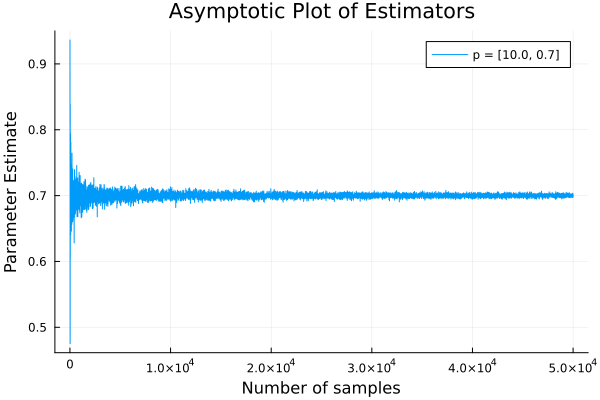

In [14]:
n = 10
ps = 0.70
params = [n, ps]
binom = Binomial # X drawn from Binom(10, 0.70)
sample_sizes = [5 * x for x in 1:10000]
fig3 = Plots.plot()
plt3 = asymptotic_estimator(params, binom_p_estimator, binom, sample_sizes)

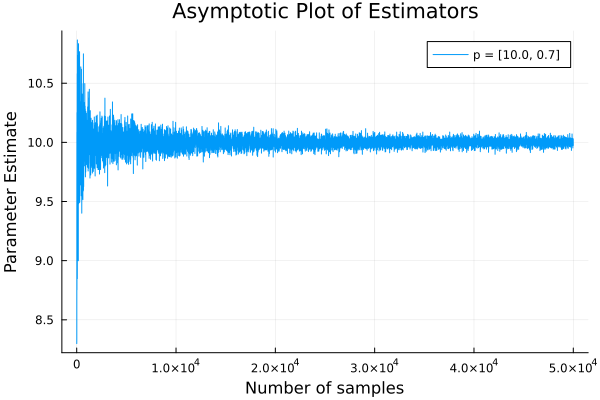

In [15]:
fig4 = Plots.plot()
plt4 = asymptotic_estimator(params, binom_n_estimator, binom, sample_sizes)

## Maximum Likelihood Estimation

In [8]:
x = [1,2,1,3]
x_2 = [a^2 for a in x]

4-element Vector{Int64}:
 1
 4
 1
 9

In [9]:
sum(x_2)

15

In [10]:
mean(x)

1.75

In [11]:
c = [0.25, 10]

2-element Vector{Float64}:
  0.25
 10.0

In [12]:
c[2]

10.0

In [13]:
Binomial(10.0, 0.25)

Binomial{Float64}(n=10, p=0.25)